<a href="https://colab.research.google.com/github/majharuli0/first-linear_regression_model/blob/main/First_ML_LR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First ML Project

# Load Data

In [ ]:
import pandas as pd
data = pd.read_csv('/content/house_pricing.csv')

# Data Preparation

## Feature Engineering

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

### a. Create new features based on existing ones.

In [ ]:
print("Original Data Shape:", data.shape)
data['bedrooms_per_bathroom'] = data['bedrooms'] / data['bathrooms'].replace(0, 1) # Avoid division by zero
data['sqft_living_squared'] = data['sqft_living'] ** 2

Original Data Shape: (4600, 18)


### b. Create a categorical feature 'houseType' based on 'sqft_living'.

In [ ]:
def assign_house_type(sqft):
    if sqft < 1500:
        return 'Small'
    elif 1500 <= sqft < 1901:
        return 'Medium'
    else:
        return 'Large'
data['houseType'] = data['sqft_living'].apply(assign_house_type)

### c. Log-transform the 'price' feature.

In [ ]:
data['log_price'] = np.log1p(data['price'])

## 2. Data Cleaning

### a. Remove rows with invalid prices (price <= 0).

In [ ]:
data = data[data['price'] > 0]
print("Rows after removing price <= 0:", len(data))

Rows after removing price <= 0: 4551


### b. Group less frequent cities into an 'Other' category.

In [ ]:
top_cities = data['city'].value_counts().index[:20]
data['city'] = data['city'].where(data['city'].isin(top_cities), 'Other')

## 3. Data Preparation for Modeling

### a. Define features (X) and target (y).

In [ ]:
numerical_features = ['bedrooms', 'sqft_living', 'bathrooms', 'floors', 'condition', 'view', 'waterfront', 'yr_built', 'sqft_living_squared']
categorical_features = ['city','houseType']
X = data[numerical_features + categorical_features]
y = data['log_price']

### b. Remove outliers based on the log-transformed price.

In [ ]:
log_price_threshold = y.quantile(0.97)
data = data[y <= log_price_threshold] # Filter data
X = X[y <= log_price_threshold]       # Filter features accordingly
y = y[y <= log_price_threshold]       # Filter target accordingly

### c. Remove rows with unusual values in numerical features.

In [ ]:
X = X[(X['bathrooms'] >= 1) & (X['view'] >= 0) & (X['condition'].isin([1, 2, 3, 4, 5])) & (X['sqft_living'] <= X['sqft_living'].quantile(0.99))]
y = y[X.index] # Align target with filtered features

###  d. One-hot encode categorical features using pandas get_dummies

In [ ]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

### e. Scale numerical features using StandardScaler.

In [ ]:
scaler = StandardScaler()
X_scaled = X.copy()  # Create a copy to avoid modifying the original DataFrame
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])
X_scaled = pd.DataFrame(X_scaled, columns=X_scaled.columns) # Convert back to DataFrame

## Display the first few rows of the scaled data

In [ ]:
X = X_scaled
print(X_scaled.head())

   bedrooms  sqft_living  bathrooms    floors  condition      view  \
0 -0.418852    -0.892505  -0.856406  0.002568  -0.664676 -0.276164   
2 -0.418852    -0.138664  -0.149650 -0.928898   0.824089 -0.276164   
3 -0.418852    -0.049225   0.203728 -0.928898   0.824089 -0.276164   
4  0.726869    -0.125887   0.557107 -0.928898   0.824089 -0.276164   
5 -1.564573    -1.480245  -1.563163 -0.928898  -0.664676 -0.276164   

   waterfront  yr_built  sqft_living_squared  city_Bellevue  ...  city_Other  \
0   -0.064445 -0.531948            -0.811107          False  ...       False   
2   -0.064445 -0.160353            -0.284666          False  ...       False   
3   -0.064445 -0.261697            -0.209601           True  ...       False   
4   -0.064445  0.177461            -0.274106          False  ...       False   
5   -0.064445 -1.106231            -1.089758          False  ...       False   

   city_Redmond  city_Renton  city_Sammamish  city_Seattle  city_Shoreline  \
0         False     

## Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print("Training features shape:", X_train.shape)  # Should be ~3680 rows
print("Testing features shape:", X_test.shape)    # Should be ~920 rows

Training features shape: (3481, 31)
Testing features shape: (871, 31)


# Model Building

## Linear Regression

### Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Applying the model to make prediction

In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
y_test_pred

array([13.41587285, 13.45040155, 12.72948502, 13.34712454, 12.82345855,
       12.44481316, 12.39730454, 12.62396165, 13.47505283, 13.51939724,
       12.49877249, 13.51251373, 13.27645896, 13.28674382, 13.13629456,
       13.50828216, 12.85205817, 13.15396084, 13.67743425, 13.57472592,
       12.41843504, 13.12636161, 13.00764942, 13.06404258, 13.57809506,
       12.36397191, 12.50565151, 12.93709892, 13.62984029, 12.55902578,
       12.49595768, 13.24126428, 12.96446277, 12.49228273, 12.12202193,
       12.79280457, 12.81336672, 12.23354932, 12.51338975, 13.90077327,
       12.9187676 , 13.2317426 , 13.08619965, 13.23464937, 13.30014532,
       12.64517786, 12.36775896, 13.03677046, 12.51235717, 12.04572625,
       13.56753649, 13.59061639, 13.44357508, 12.53697076, 12.75932989,
       13.10206543, 13.23945045, 13.24663968, 12.30295527, 13.06717388,
       13.26532601, 12.84383647, 12.3523583 , 12.80496378, 13.80088576,
       13.53660694, 12.96174725, 12.8936229 , 13.53320433, 12.73

In [ ]:
y_train_pred

array([12.76383   , 12.00848736, 13.17294876, ..., 12.71113651,
       12.49877249, 13.52215301])

### Evaluate model performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_train_r2 = r2_score(y_train, y_train_pred)


# print("Linear Regression - Test MSE:", lr_test_mse)
# print("Linear Regression - Test R2:", lr_test_r2)
# print("Linear Regression - Train MSE:", lr_train_mse)
# print("Linear Regression - Train R2:", lr_train_r2)

In [ ]:
lr_result = pd.DataFrame(['Linear Regression', lr_test_mse,lr_test_r2,lr_train_mse,lr_train_r2]).transpose()
lr_result.columns = ['Model','Test MSE','Test R2','Train MSE','Train R2']
lr_result

,Model,Test MSE,Test R2,Train MSE,Train R2
0,Linear Regression,0.067559,0.695101,0.068764,0.700341


#Data visualization of prediction result

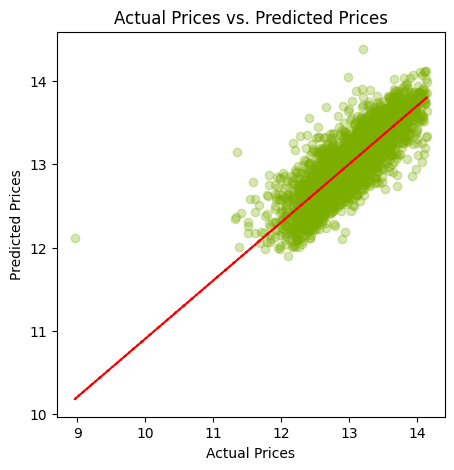

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_train_pred, label='Training Data',c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "r--", label='Regression Line')


plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()